# Ejercicio 1

<img src="fig/eje1.png" width="300">

En la figura se muestra un filtro sintonizado realizado con un inductor y un capacitor que esta sintonizado a $f = 10\,MHz$.

El inductor tiene un $Q_{oL}(10MHz) = 100$ y suponga que el capacitor tiene $ESR\sim 0\Omega$. 

La fuente tiene una $P_{disp} = 200\,pW$ a $f = 10\,MHz$.

$R_L$ 


1. Calcule $L_1$ y $C_1$ para adaptar MTE con $Q_c = 20$ y el generador a $10MHz$.
2. Calcule la impedancia de entrada del adaptador cargado a $10 MHz$. 
3. Calcule las pérdidas del adaptador y la potencia sobre la carga.
4. Verificar utilizando simuladores.  


#### Respuestas

### Circuito incluyendo las pérdidas de los componentes.

<img src="fig/eje1a.png" width="300">

### 2. Para máxima transferencia de energía a $Q$ constante, ¿ cual debe ser el valor de $R_L$?

Para máxima transferencia posible RL = Rg = 50 Ω

### 3. Calcule $L_1$ y $C_1$ para adaptar MTE con $Q_c = 20$ y el generador a $10MHz$.

3.a) L =1.59e-08 Hy
3.b) C =1.59e-08 F


### 4. Calcule la impedancia de entrada del adaptador cargado a $10 MHz$. 

4) Rin 33.33 ohms

### 5. Calcule las pérdidas del adaptador y la potencia sobre la carga.

5.a) Perdida = 36 \%
5.b) PRL = 1.28e-10 W

### 6. Verificar utilizando simuladores.  

<img src="fig/eje1sim.png" width="300">

    

 ## Calculos

In [1]:
import numpy as np
from IPython.display import Image

Pdisp =  200e-12
Qc = 20
Qo = 100
fo  =  10e6

wo = 2*np.pi*fo

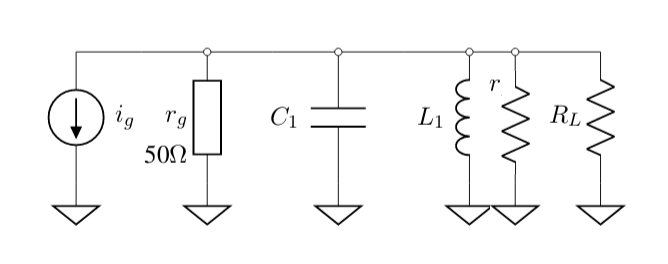

In [2]:
#a)
Image(filename= "fig/eje1a.png",width=350)

In [18]:
#b) 
rg = 50 

RL = rg

print('RL= {:1.3f} ohms'.format(RL) )

RL= 50.000 ohms


In [19]:
#c) 
# Rext es la resistencia del generador y la carga en paralelo.
Rext = rg * RL / (rg + RL )

# Despejando L
L =  (1/Qc - 1/Qo)*Rext/wo

# Calculando C
C  =  1/(L*wo)**2 

#Informo resultados
print('c1) L ={:2.2e} Hy'.format(L) ) 
print('c2) C ={:2.2e} F'.format(C) ) 

c1) L =1.59e-08 Hy
c2) C =1.00e+00 F


In [20]:
#d)
# La impedancia de entrada es la que "presenta" el circuito a la carga. 

# Calculo las perdidas
rp =  Qo * (L * wo )

# la impedancia de entrada es el paralelo entre las perdidas 
#y la carga (en este caso).
Rin = RL * rp / (RL + rp)

#Informo resultados
print('d) Rin {:2.2f} ohms'.format(Rin) ) 

d) Rin 33.33 ohms


In [21]:
#e)
# Calculo perdidas (es porcentual).
perdida  = 1- (1-Qc/Qo)**2

# Calculo potencia sobre la carga
PRL = Pdisp*((1-Qc/Qo)**2)


print('e1) Perdida = {:2.2f} , PRL = {:2.2e} W'.format(perdida ,PRL) ) 

e1) Perdida = 0.36 , PRL = 1.28e-10 W


In [23]:
# Calculo de la fuente de corriente

# La corriente de la fuente se calcula como:
# La potenicia disponible es la mitad de la que entrega la fuente a 
# una carga totalmente adaptada.
igpico  = (Pdisp *8 / rg )**0.5  # PICO


# NOTA: La potencia disponible es la que se desarrolla en 
#la carga cuando esta adaptada para máxima transferencia de energía 
# (o sea que la impedancia de carga de la fuente es rg, 50ohms )
# En el caso del ejercicio, el adaptador presenta 33 ohms 
# ya que se calculó para MTE a Qcte!

vo  = igpico * (Rin*rg/(Rin + rg))

PRL = vo**2 /RL /2
Prp = vo**2 /rp /2

print('igpico =  {:1.3e} A'.format(igpico) )
print('PRL =  {:1.3e} W'.format(PRL) )
print('Potencia disipada en el adaptador =  {:1.3e} W'.format(Prp) )

igpico =  5.657e-06 A
PRL =  1.280e-10 W
Potencia disipada en el adaptador =  6.400e-11 W


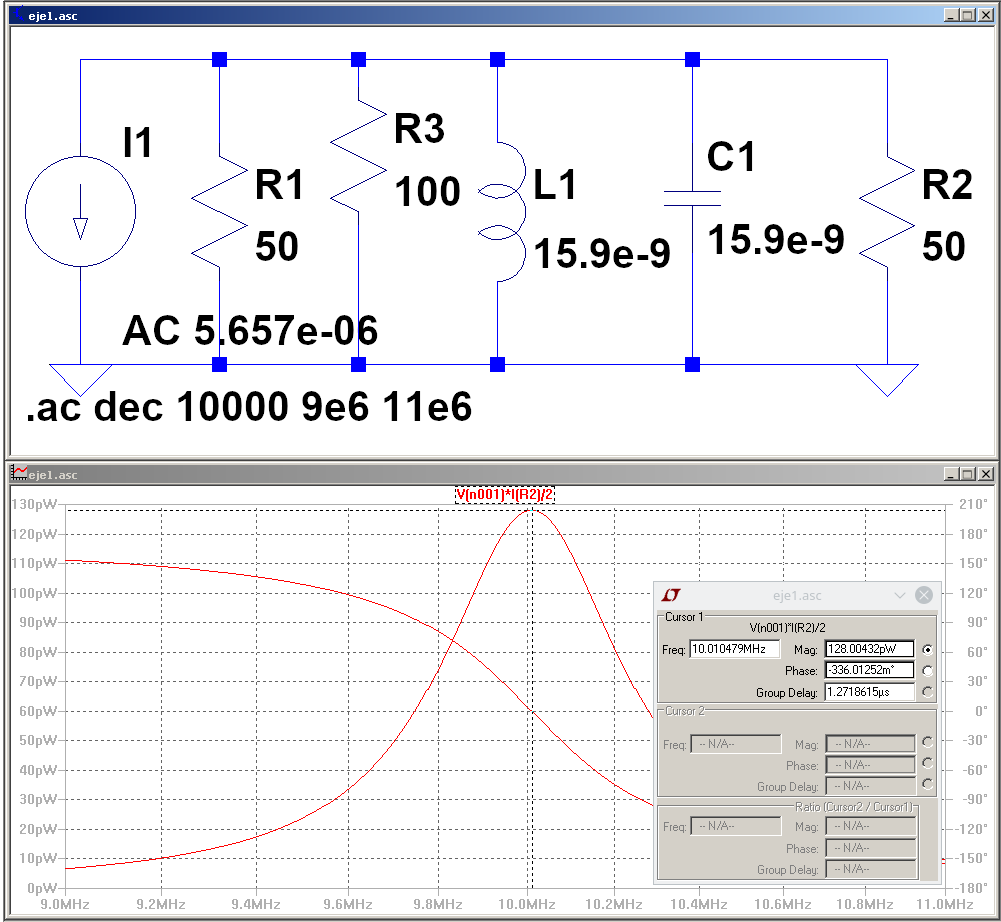

In [9]:
Image(filename= "fig/eje1sim.png",width=750)

## Revisar que las perdidas de los componentes sea despresiables!